In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [120]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=4, random_state=42)

In [121]:
X

array([[-2.28253389e+00, -9.69281529e+00],
       [-6.14766774e+00,  1.75599022e+00],
       [ 1.33990906e+01, -1.26002346e+00],
       [-4.07763024e+00,  3.16022634e+00],
       [ 9.44473452e+00,  3.40868192e-01],
       [ 7.96122210e+00, -1.45116562e+00],
       [ 3.36071096e+00, -7.26434919e+00],
       [ 5.72170614e+00,  1.77221725e+00],
       [ 3.69397119e-01,  1.40365174e+00],
       [-9.37890150e+00, -6.77574539e+00],
       [ 2.05358730e+00, -2.35302233e+00],
       [ 2.12518469e+00,  5.73155685e+00],
       [ 6.02293588e+00,  1.20593493e+00],
       [-2.25635580e-01,  1.35565487e+01],
       [ 5.79897826e+00,  1.02747729e+01],
       [ 8.87357678e+00, -5.06178826e+00],
       [-2.79723811e+00,  1.30284177e+01],
       [-1.13705153e+01, -5.35047061e+00],
       [-6.55049123e+00, -2.61818809e+00],
       [-6.93453752e+00,  4.22945963e+00],
       [-9.54391459e-01,  4.22504663e+00],
       [-1.67374324e+00,  1.17560563e+00],
       [ 6.94610669e+00,  3.21817030e+00],
       [-6.

In [122]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df.head()

,Feature_1,Feature_2
0,-2.282534,-9.692815
1,-6.147668,1.755990
2,13.399091,-1.260023
3,-4.077630,3.160226
4,9.444735,0.340868


In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [124]:
inertia = []
K_range = range(1, 11)

In [125]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [126]:
inertia

[999.9999999999992,
 528.806443260565,
 294.4377068678185,
 250.45524696534443,
 216.88110656982604,
 185.27440675195905,
 156.70879996290444,
 135.62603453115244,
 129.10396348239814,
 119.94101297104993]

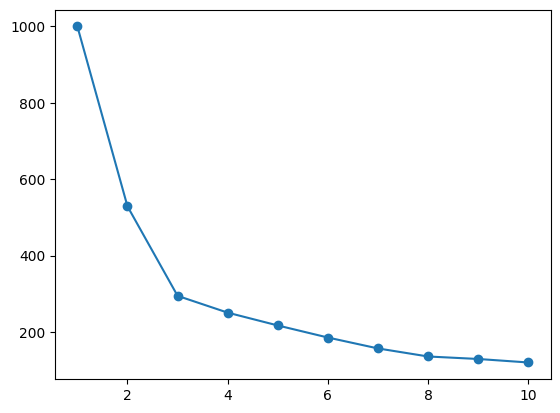

In [127]:
plt.plot(K_range, inertia, marker='o')

In [128]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [129]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [130]:
cluster_labels

array([1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0,
       2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,

In [131]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

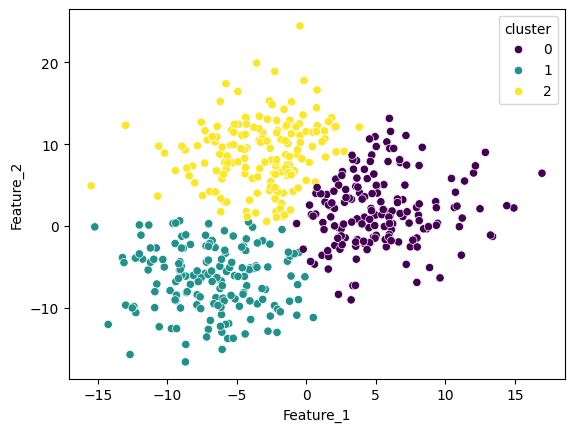

In [132]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')

In [133]:
from sklearn.datasets import make_moons

In [134]:
X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

# DB Scan Clustering

In [135]:
from sklearn.cluster import KMeans, DBSCAN

In [136]:
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

In [137]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [138]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [139]:
df['kmeans_cluster'] = kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

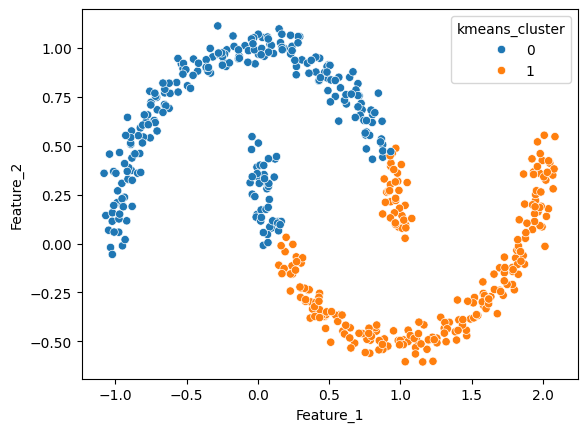

In [140]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['kmeans_cluster'], palette='tab10')

In [141]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [142]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

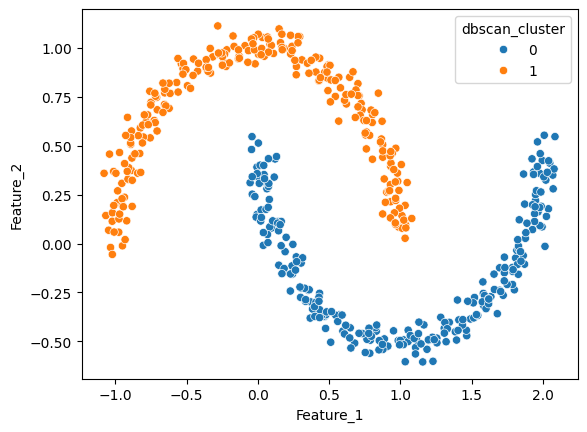

In [144]:
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['dbscan_cluster'], palette='tab10')